# Hierarchical clustering with 2D toy datasets
***
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

In [1]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

In [3]:
# 設定群集與繪圖參數
plot_num = 1
fig, ax = plt.subplots(nrows = 6, ncols= 3, figsize=(20,30))
default_base = {'n_neighbors': 10, 'n_clusters': 3}


# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同

In [4]:
# noisy circles
noisy_circles = datasets.make_circles(n_samples=n_samples,factor=.5,noise=.05)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

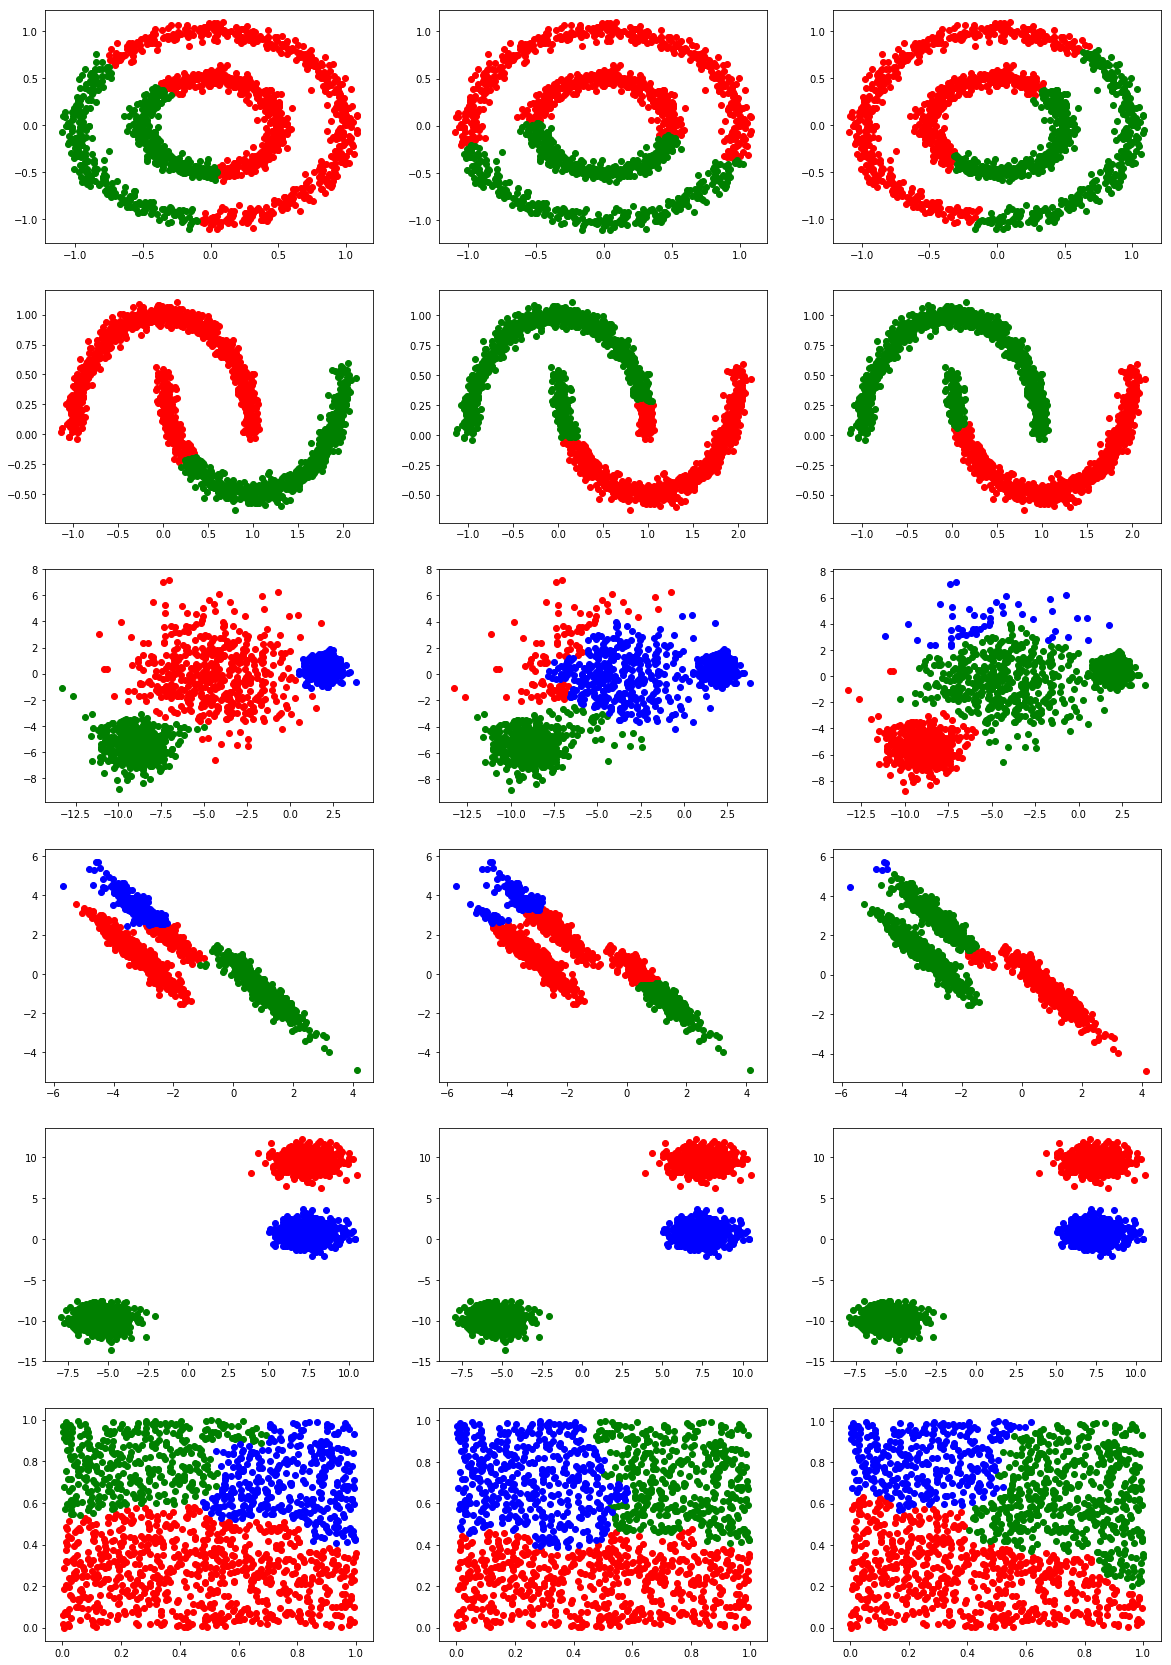

In [7]:
# 執行各種樣板資料的繪圖迴圈
color_list = ['r','g','b']

for i_dataset, (dset, parms) in enumerate(datasets):
    base = default_base.copy()
    base.update(parms)
    n_clusters = base['n_clusters']
    estimators = [('hc_ward', AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")),
                  ('hc_complete', AgglomerativeClustering(n_clusters=n_clusters, linkage="complete")),
                  ('hc_average', AgglomerativeClustering(n_clusters=n_clusters, linkage="average"))]
    for i_est, (name,est) in enumerate(estimators):
        X, y = dset
        X = StandardScaler().fit_transform(X)
        label = est.fit_predict(X)
        for n in range(n_clusters):
            ax[i_dataset,i_est].scatter(dset[0][label==n,0],dset[0][label==n,1],color=color_list[n])
plt.show()